In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
data, metadata = tfds.load('mnist', as_supervised = True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
tfds.as_dataframe(data['train'].take(5),metadata)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


In [4]:
train_data = data['train']
test_data = data['test']

In [5]:
def normalize(images, targets):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, targets

In [6]:
rain_data = train_data.map(normalize)
test_data = test_data.map(normalize)
train_data = train_data.cache()
test_data = test_data.cache()
clases = ['0','1','2','3','4','5','6','7','8','9']

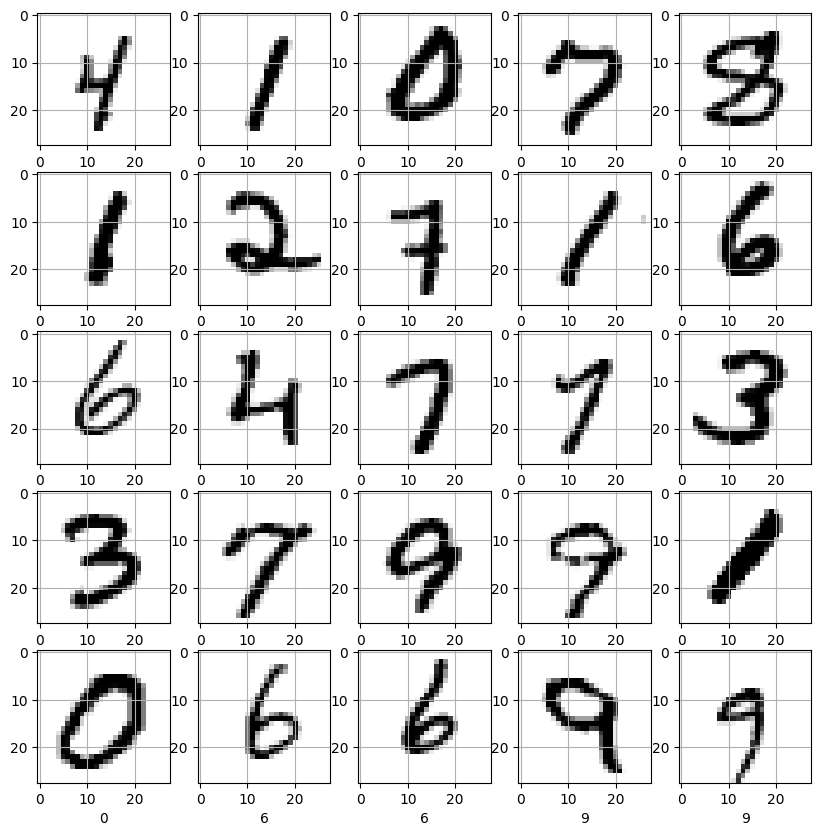

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (image, target) in enumerate(train_data.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.grid(True)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(clases[target])

In [10]:
modelo = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28,1)),
tf.keras.layers.Dense(units=50, activation = 'relu'),
tf.keras.layers.Dense(units=50, activation = 'relu'),
tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [11]:
modelo.compile(
optimizer = 'adam',
loss = tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accurancy']
)

In [12]:
num_train_data = metadata.splits['train'].num_examples
num_test_data = metadata.splits['test'].num_examples
chunks_size = 32
train_data = train_data.repeat().shuffle(num_train_data).batch(chunks_size)
test_data = test_data.batch(chunks_size)

In [14]:
import math
fit_model = modelo.fit(
train_data,
epochs = 60,
steps_per_epoch=math.ceil(num_train_data/chunks_size)
)

Epoch 1/60


TypeError: ignored